# **5. Data**


In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from ToolBox import cardinalidad, describe_df
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
df = pd.read_csv("src/data_sample/gdp_model_focused.csv")

In [3]:
df["target"] = df["GDP growth (annual %)"]

In [4]:
df.drop(columns = ["GDP growth (annual %)"], inplace = True)

In [5]:

X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis=1),
                                                    df['target'],
                                                    test_size=0.2,
                                                    random_state=42)

In [6]:
X_train.columns

Index(['year', 'country', 'GDP per capita (constant 2015 US$)',
       'Gross fixed capital formation (% of GDP)',
       'Gross domestic savings (% of GDP)',
       'Inflation, GDP deflator (annual %)',
       'Exports of goods and services (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Population growth (annual %)',
       'Industry (including construction), value added (% of GDP)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Services, value added (% of GDP)',
       'School enrollment, secondary (% gross)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Access to electricity, rural (% of rural population)'],
      dtype='object')

In [7]:
cardinalidad(X_train, 300, umbral_continua = 30)

nombre_variable  valores_unicos  \
0                                                year              65   
1                                             country             260   
2                  GDP per capita (constant 2015 US$)           10854   
3            Gross fixed capital formation (% of GDP)            7740   
4                   Gross domestic savings (% of GDP)            8346   
5                  Inflation, GDP deflator (annual %)            9783   
6            Exports of goods and services (% of GDP)            8569   
7            Imports of goods and services (% of GDP)            8595   
8   Foreign direct investment, net inflows (% of GDP)            8778   
9                        Population growth (annual %)           12965   
10  Industry (including construction), value added...            8374   
11  Agriculture, forestry, and fishing, value adde...            8440   
12                   Services, value added (% of GDP)            7921   
13             School enrollment, secondary (% gross)            7421   
14  Literacy rate, adult total (% of people ages 1...            1482   
15  Access to electricity, rural (% of rural popul...            2007   

    cardinalidad      tipo_sugerido  
0       0.004808         Categórica  
1       0.019231         Categórica  
2       0.802811  Numerica Discreta  
3       0.572485  Numerica Discreta  
4       0.617308  Numerica Discreta  
5       0.723595  Numerica Discreta  
6       0.633802  Numerica Discreta  
7       0.635725  Numerica Discreta  
8       0.649260  Numerica Discreta  
9       0.958950  Numerica Discreta  
10      0.619379  Numerica Discreta  
11      0.624260  Numerica Discreta  
12      0.585873  Numerica Discreta  
13      0.548891  Numerica Discreta  
14      0.109615  Numerica Discreta  
15      0.148447  Numerica Discreta

In [8]:
# Estadísticos
X_train.describe()
X_train.describe(include='all')

# Tipos de los datos
X_train.dtypes

# Tipos de los datos y missings
X_train.info()

# Columnas del dataset
X_train.columns

# dimensiones del dataset
print("Filas:", X_train.shape[0])
print("Columnas:", X_train.shape[1])

<class 'pandas.core.frame.DataFrame'>
Index: 13520 entries, 3577 to 15795
Data columns (total 16 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   year                                                        13520 non-null  int64  
 1   country                                                     13520 non-null  object 
 2   GDP per capita (constant 2015 US$)                          10940 non-null  float64
 3   Gross fixed capital formation (% of GDP)                    7818 non-null   float64
 4   Gross domestic savings (% of GDP)                           8387 non-null   float64
 5   Inflation, GDP deflator (annual %)                          10765 non-null  float64
 6   Exports of goods and services (% of GDP)                    8645 non-null   float64
 7   Imports of goods and services (% of GDP)                    8658 non-null   float64
 8 

In [9]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T
        
data_report(X_train)

COL_N           year country GDP per capita (constant 2015 US$)  \
DATA_TYPE      int64  object                            float64   
MISSINGS (%)     0.0     0.0                              19.08   
UNIQUE_VALUES     65     260                              10854   
CARDIN (%)      0.48    1.92                              80.28   

COL_N         Gross fixed capital formation (% of GDP)  \
DATA_TYPE                                      float64   
MISSINGS (%)                                     42.17   
UNIQUE_VALUES                                     7740   
CARDIN (%)                                       57.25   

COL_N         Gross domestic savings (% of GDP)  \
DATA_TYPE                               float64   
MISSINGS (%)                              37.97   
UNIQUE_VALUES                              8346   
CARDIN (%)                                61.73   

COL_N         Inflation, GDP deflator (annual %)  \
DATA_TYPE                                float64   
MISSINGS (%)                               20.38   
UNIQUE_VALUES                               9783   
CARDIN (%)                                 72.36   

COL_N         Exports of goods and services (% of GDP)  \
DATA_TYPE                                      float64   
MISSINGS (%)                                     36.06   
UNIQUE_VALUES                                     8569   
CARDIN (%)                                       63.38   

COL_N         Imports of goods and services (% of GDP)  \
DATA_TYPE                                      float64   
MISSINGS (%)                                     35.96   
UNIQUE_VALUES                                     8595   
CARDIN (%)                                       63.57   

COL_N         Foreign direct investment, net inflows (% of GDP)  \
DATA_TYPE                                               float64   
MISSINGS (%)                                              33.53   
UNIQUE_VALUES                                              8778   
CARDIN (%)                                                64.93   

COL_N         Population growth (annual %)  \
DATA_TYPE                          float64   
MISSINGS (%)                           3.3   
UNIQUE_VALUES                        12965   
CARDIN (%)                           95.89   

COL_N         Industry (including construction), value added (% of GDP)  \
DATA_TYPE                                                float64          
MISSINGS (%)                                                37.4          
UNIQUE_VALUES                                               8374          
CARDIN (%)                                                 61.94          

COL_N         Agriculture, forestry, and fishing, value added (% of GDP)  \
DATA_TYPE                                                float64           
MISSINGS (%)                                               36.92           
UNIQUE_VALUES                                               8440           
CARDIN (%)                                                 62.43           

COL_N         Services, value added (% of GDP)  \
DATA_TYPE                              float64   
MISSINGS (%)                             40.77   
UNIQUE_VALUES                             7921   
CARDIN (%)                               58.59   

COL_N         School enrollment, secondary (% gross)  \
DATA_TYPE                                    float64   
MISSINGS (%)                                   44.53   
UNIQUE_VALUES                                   7421   
CARDIN (%)                                     54.89   

COL_N         Literacy rate, adult total (% of people ages 15 and above)  \
DATA_TYPE                                                float64           
MISSINGS (%)                                               84.06           
UNIQUE_VALUES                                               1482           
CARDIN (%)                                                 10.96           

COL_N         Access to electricity, 

# **6. Feature Reduction**

In [ ]:
#Some of my columns with more tha  40 % missing values I will not remove, due to the importance for prediction: Gross fixed capital formation (% of GDP) is the main one.
# I will remove for now : Services, value added (% of GDP), School enrollment, secondary (% gross), Literacy rate, adult total (% of people ages 15 and above), Access to electricity, rural (% of rural population)

In [10]:
print("Columnas post drop:", len(X_train.columns))

Columnas post drop: 16


In [11]:
X_train.drop(columns=["Services, value added (% of GDP)","School enrollment, secondary (% gross)", "Literacy rate, adult total (% of people ages 15 and above)","Access to electricity, rural (% of rural population)" ], inplace=True)
X_test.drop(columns=["Services, value added (% of GDP)","School enrollment, secondary (% gross)", "Literacy rate, adult total (% of people ages 15 and above)","Access to electricity, rural (% of rural population)" ], inplace=True)

In [12]:
print("Columnas post drop:", len(X_train.columns))

Columnas post drop: 12


In [13]:
#I won´t do anymore feature selection since I first need to handle missing values.

# **7. Univariant Analysis**

KeyError: 'GDP growth (annual %)'

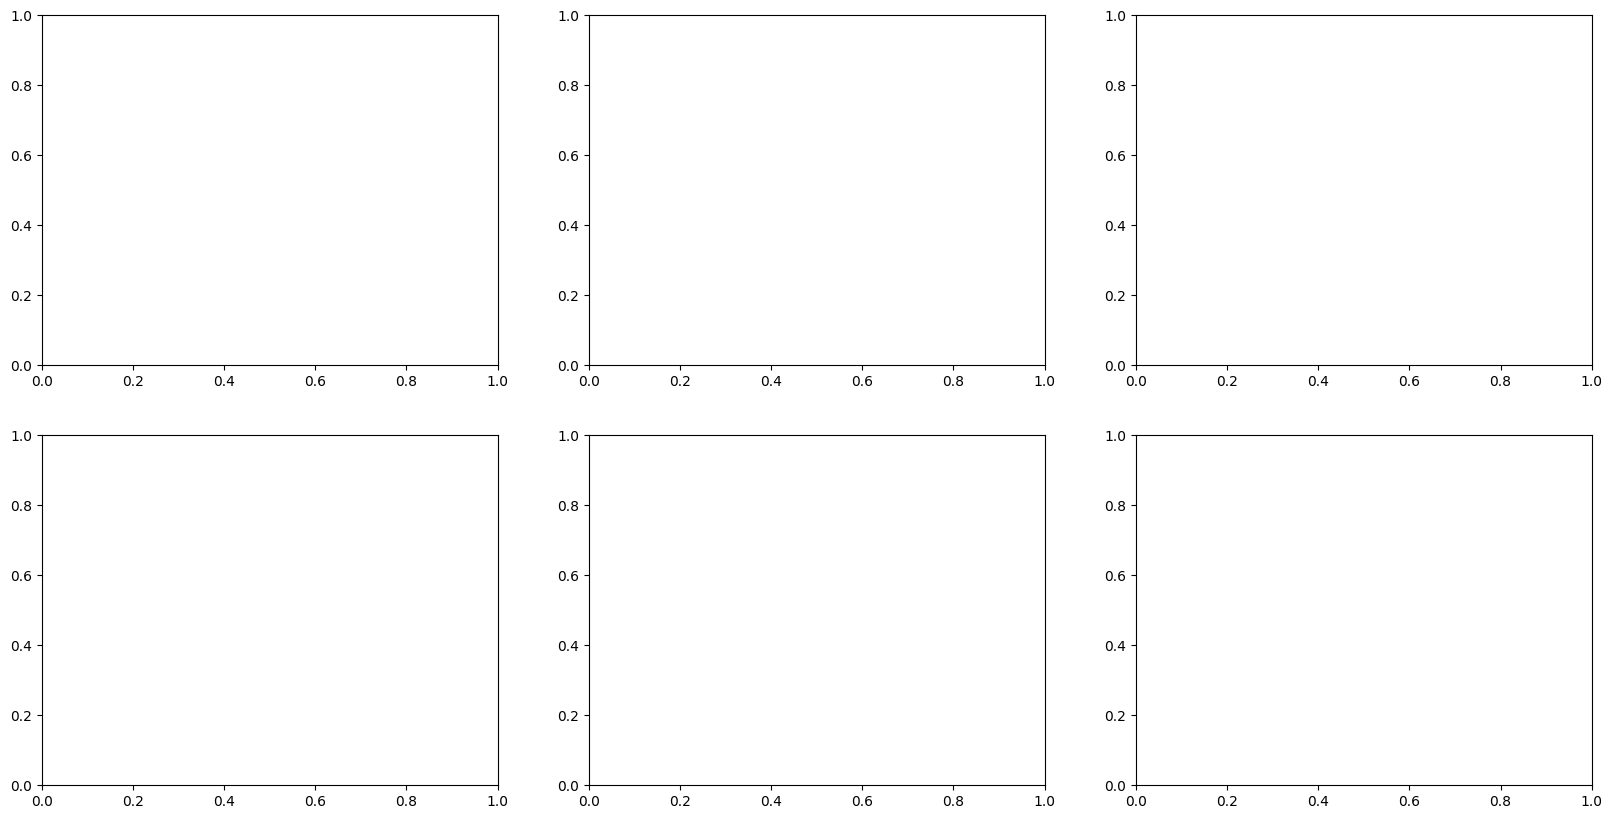

In [15]:
#Not very useful, Ill resuse previous one

fig, axes = plt.subplots(2, 3, figsize=(20, 10))




# Funcion de densidad
sns.kdeplot(X_train["GDP growth (annual %)"], ax=axes[0, 0])
axes[0, 0].set_title("Función de densidad")

# Histograma
sns.histplot(X_train["GDP growth (annual %)"],
             kde=False,
             color='slategray',
             ax=axes[0, 1]);

axes[0, 1].set_title("Histograma")

# Funcion de densidad + histograma
sns.histplot(X_train["GDP growth (annual %)"],
             ax=axes[0, 2],
             kde=True,
            line_kws={'color': 'g',  "lw": 3, "label": "KDE"},
            color= "green",
             linewidth= 3,
                      alpha= 1 
             )

axes[0, 2].set_title("Funcion de densidad + hist.")

# Boxplot
sns.boxplot(X_train["GDP growth (annual %)"], color="slategray", ax=axes[1, 0])
axes[1, 0].set_title("Box plot")

# Violin plot
sns.violinplot(X_train["GDP growth (annual %)"], color="slategray", ax=axes[1, 1])
axes[1, 1].set_title("Violin plot")


# Funcion de densidad + target
sns.kdeplot(data=X_train, x="GDP growth (annual %)", hue = 'target', ax=axes[1, 2])
axes[1, 2].set_title("FDP + target");

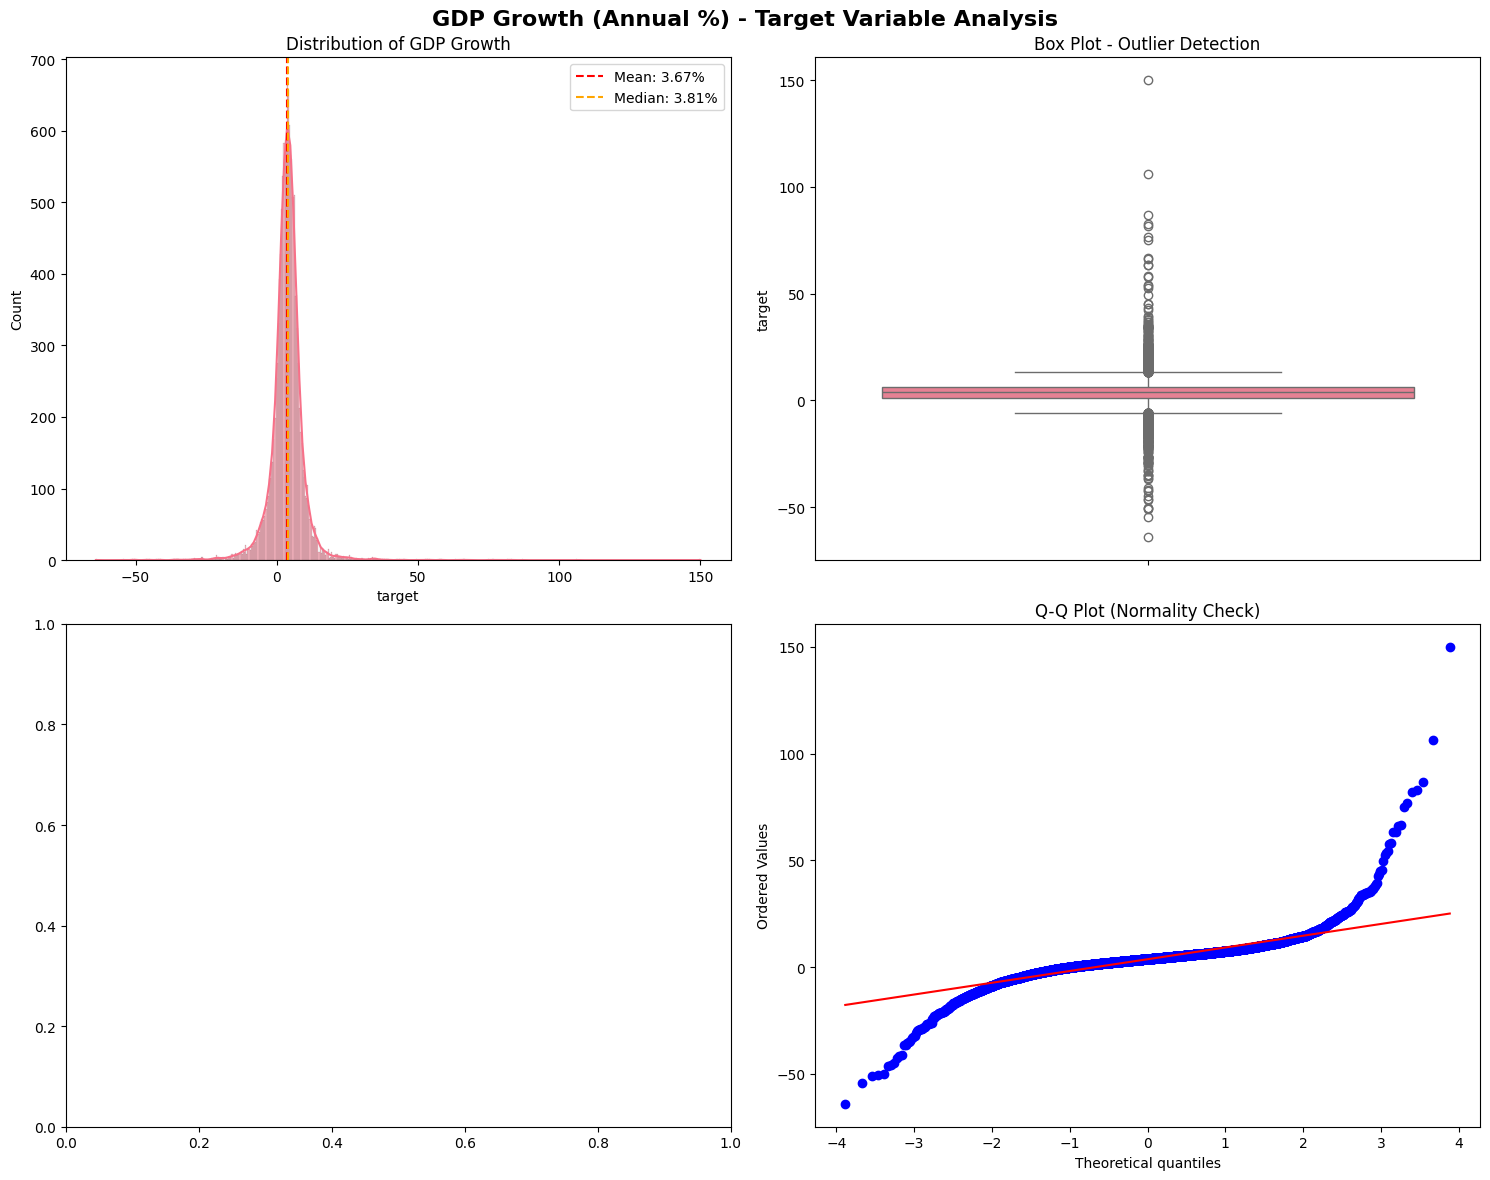

In [16]:

# Style for plots
plt.style.use('default')
sns.set_palette("husl")


# Subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('GDP Growth (Annual %) - Target Variable Analysis', fontsize=16, fontweight='bold')

# 1. Distribution plot (histogram + KDE)
sns.histplot(data=df, x="target", kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of GDP Growth')
axes[0,0].axvline(df["target"].mean(), color='red', linestyle='--', label=f'Mean: {df["target"].mean():.2f}%')
axes[0,0].axvline(df["target"].median(), color='orange', linestyle='--', label=f'Median: {df["target"].median():.2f}%')
axes[0,0].legend()

# 2. Box plot to see outliers
sns.boxplot(data=df, y="target", ax=axes[0,1])
axes[0,1].set_title('Box Plot - Outlier Detection')


# 3. Q-Q plot to check normality
from scipy import stats
stats.probplot(df["target"].dropna(), dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot (Normality Check)')

plt.tight_layout()
plt.show()

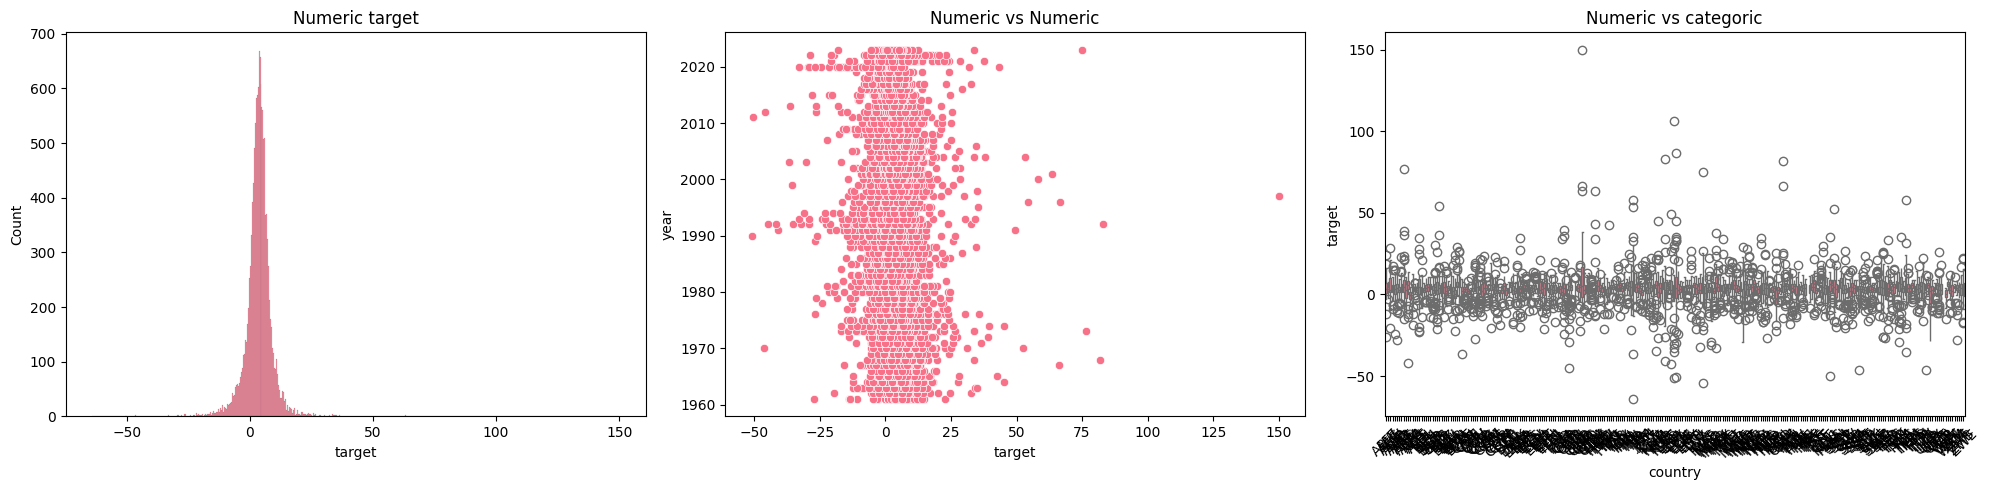

In [20]:

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Numeric target
sns.histplot(df["target"], ax=axes[0])
axes[0].set_title("Numeric target")

# Numeric vs Numeric - choose an available numeric column
# Option 1: If Year is in index
if 'Year' in df.index.names or df.index.name == 'Year':
    sns.scatterplot(x=df["target"], y=df.index, ax=axes[1])
# Option 2: Use a different numeric column
else:
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    other_numeric = [col for col in numeric_cols if col != "target"][0]  # Get first other numeric column
    sns.scatterplot(x=df["target"], y=X_train[other_numeric], ax=axes[1])
    
axes[1].set_title("Numeric vs Numeric")

# Categorica vs target
sns.boxplot(data=df, x="country", y="target", ax=axes[2])
axes[2].set_title("Numeric vs categoric")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

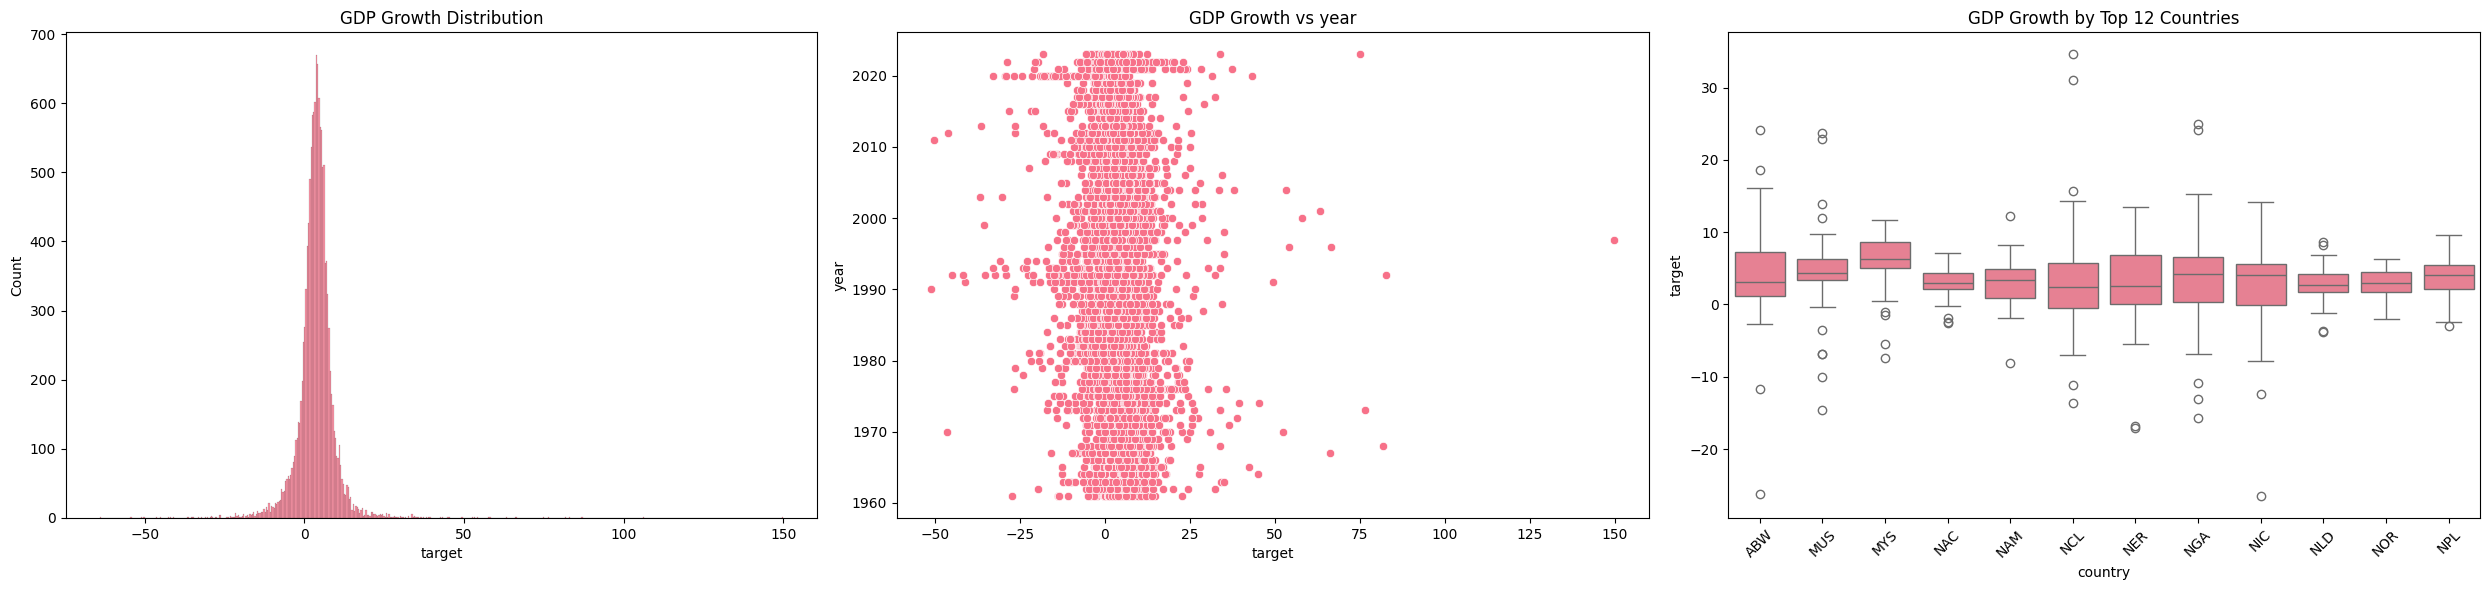

Total countries in dataset: 260
Showing top 12 countries by data availability


In [21]:
#Viewing again, numeric vs categoric


fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Numeric target
sns.histplot(df["target"], ax=axes[0])
axes[0].set_title("GDP Growth Distribution")

# Numeric vs Numeric (assuming you have another numeric column)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_cols) > 1:
    other_col = [col for col in numeric_cols if col != "target"][0]
    sns.scatterplot(x=df["target"], y=X_train[other_col], ax=axes[1])
    axes[1].set_title(f"GDP Growth vs {other_col}")

# Top countries only
top_countries = df['country'].value_counts().head(12).index
df_top = df[df['country'].isin(top_countries)]
sns.boxplot(data=df_top, x="country", y="target", ax=axes[2])
axes[2].set_title("GDP Growth by Top 12 Countries")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Optional: Show summary statistics for all countries
print(f"Total countries in dataset: {X_train['country'].nunique()}")
print(f"Showing top {len(top_countries)} countries by data availability")

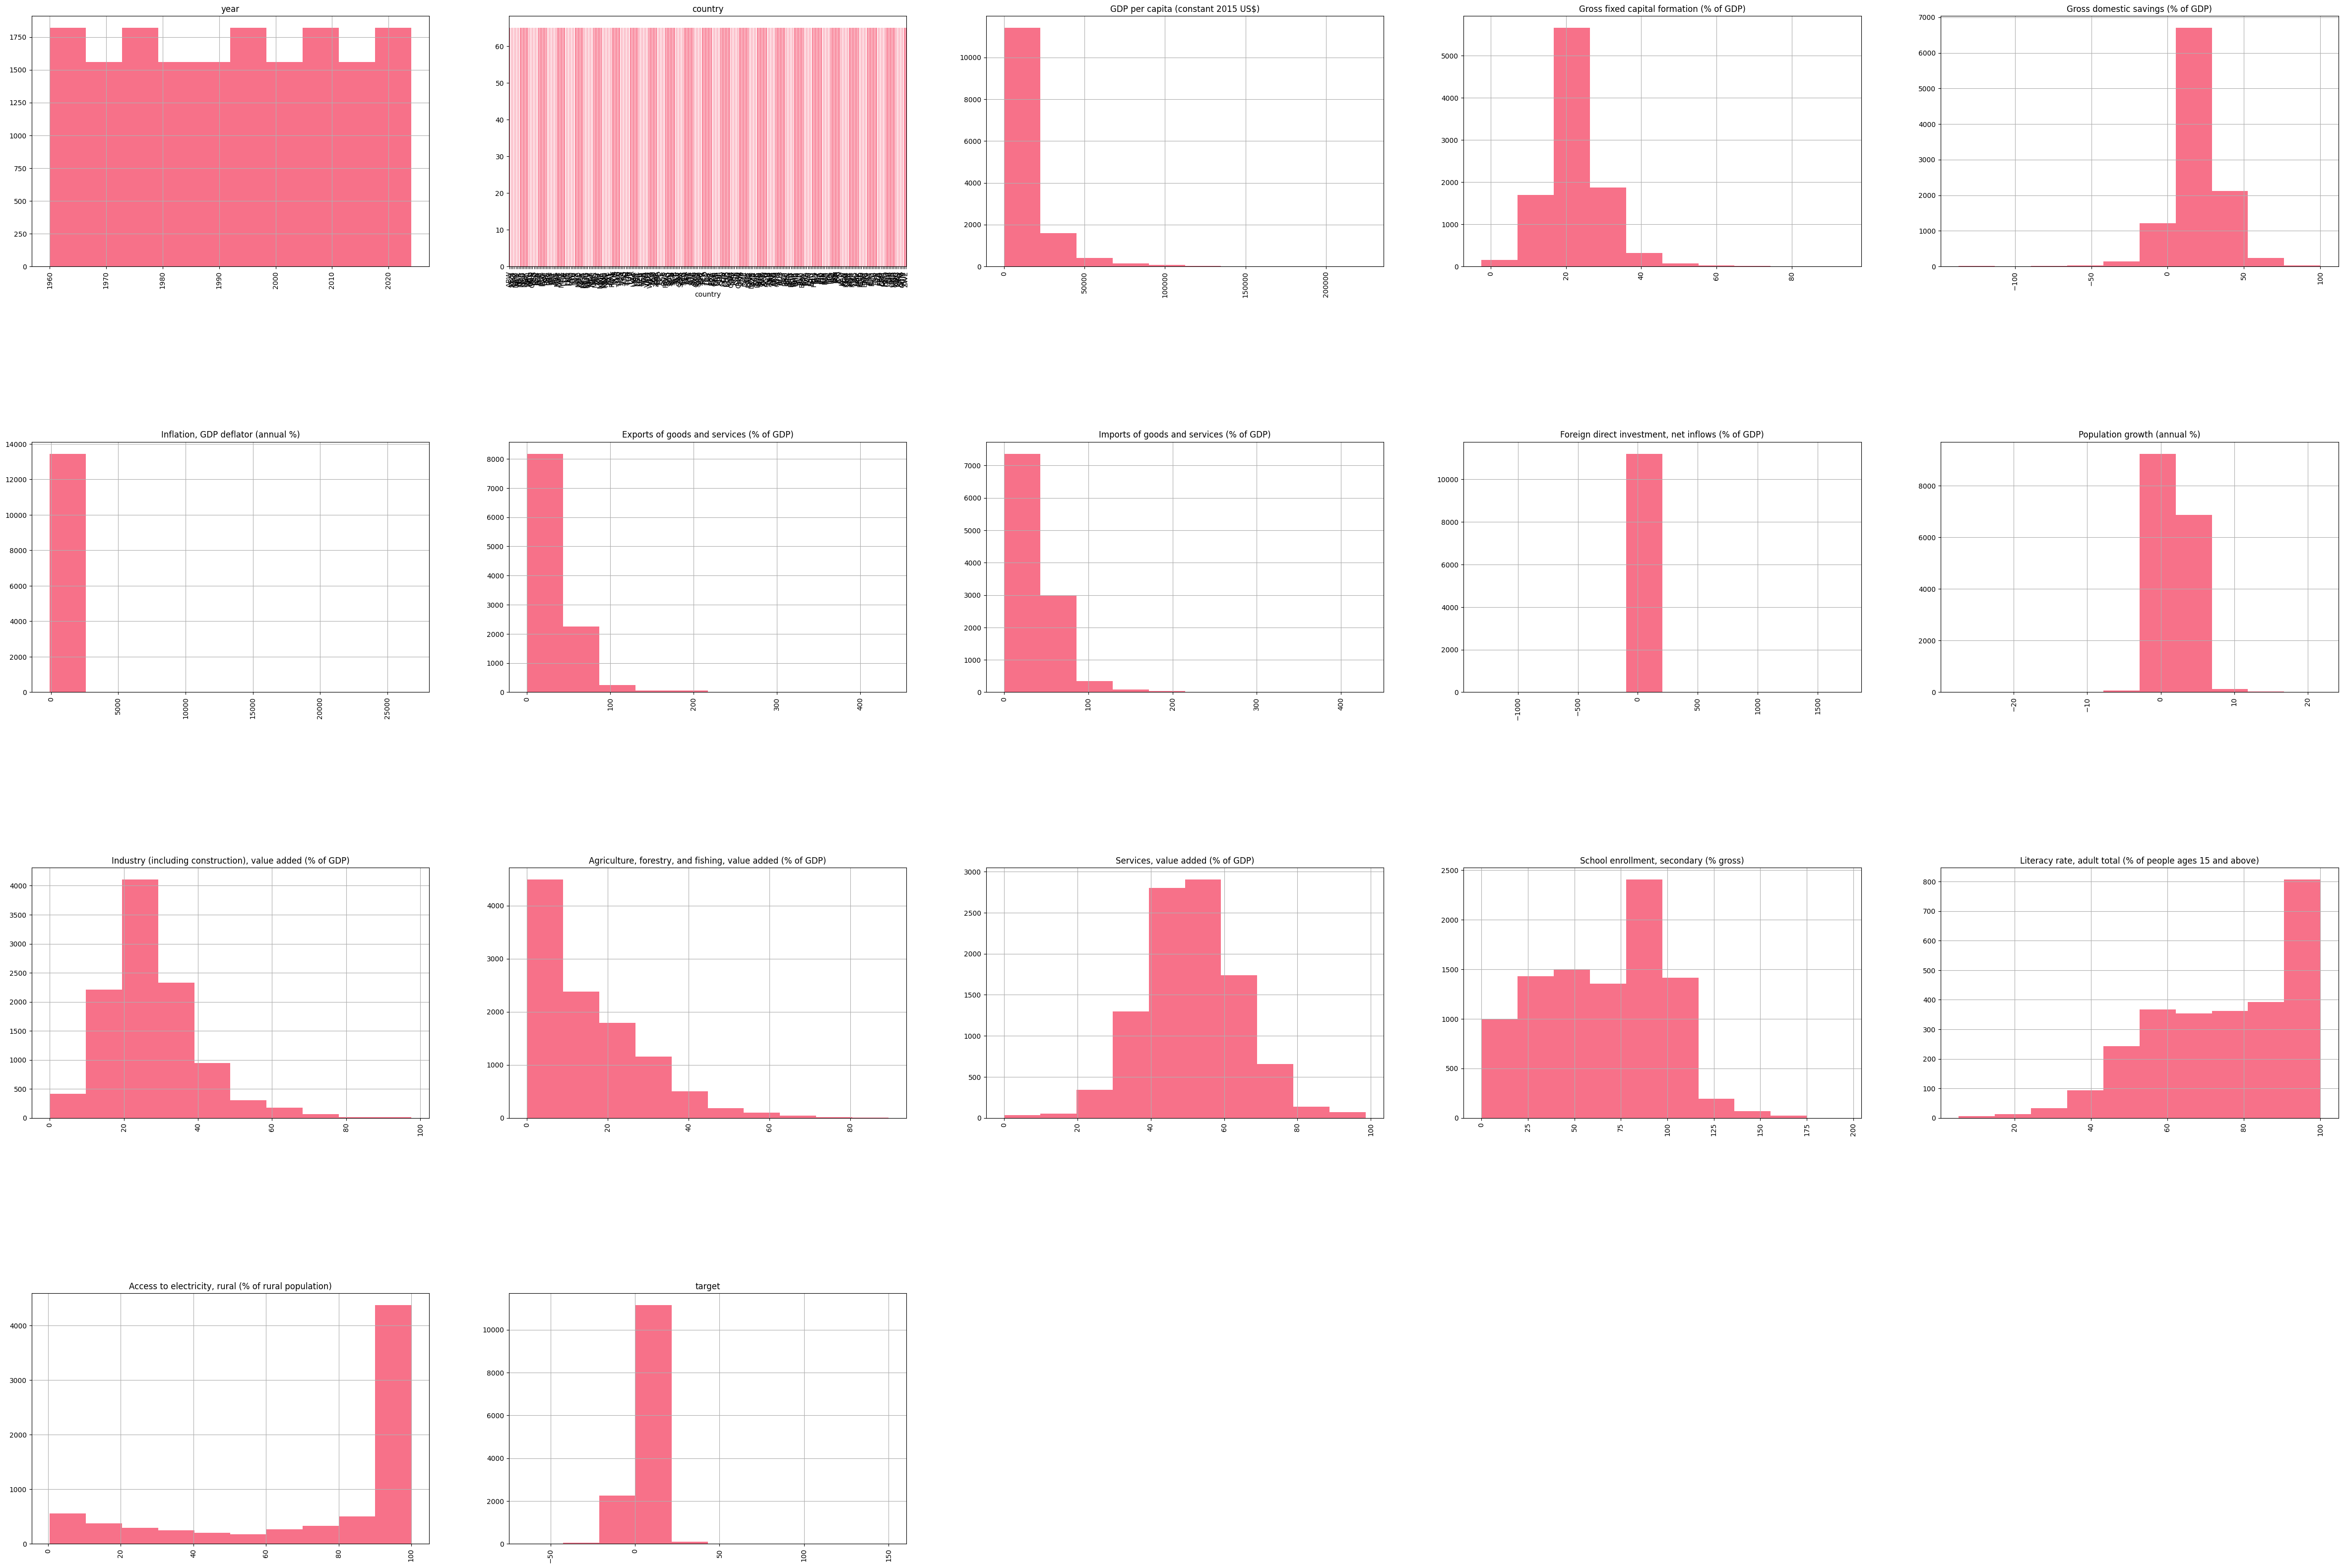

In [22]:
fig = plt.figure(figsize=(60, 40))
cols = 5
rows = int(np.ceil(float(df.shape[1]) / cols))
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df.dtypes[column] == object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

Features I´ll have to engineer from this graph: Agricultire, forestry...etc, GDP per capita, Gross fixed capital fomration, Exporta of goods, Imports of goods, Industry, population growth.

# **8. Multivariant Analysis**

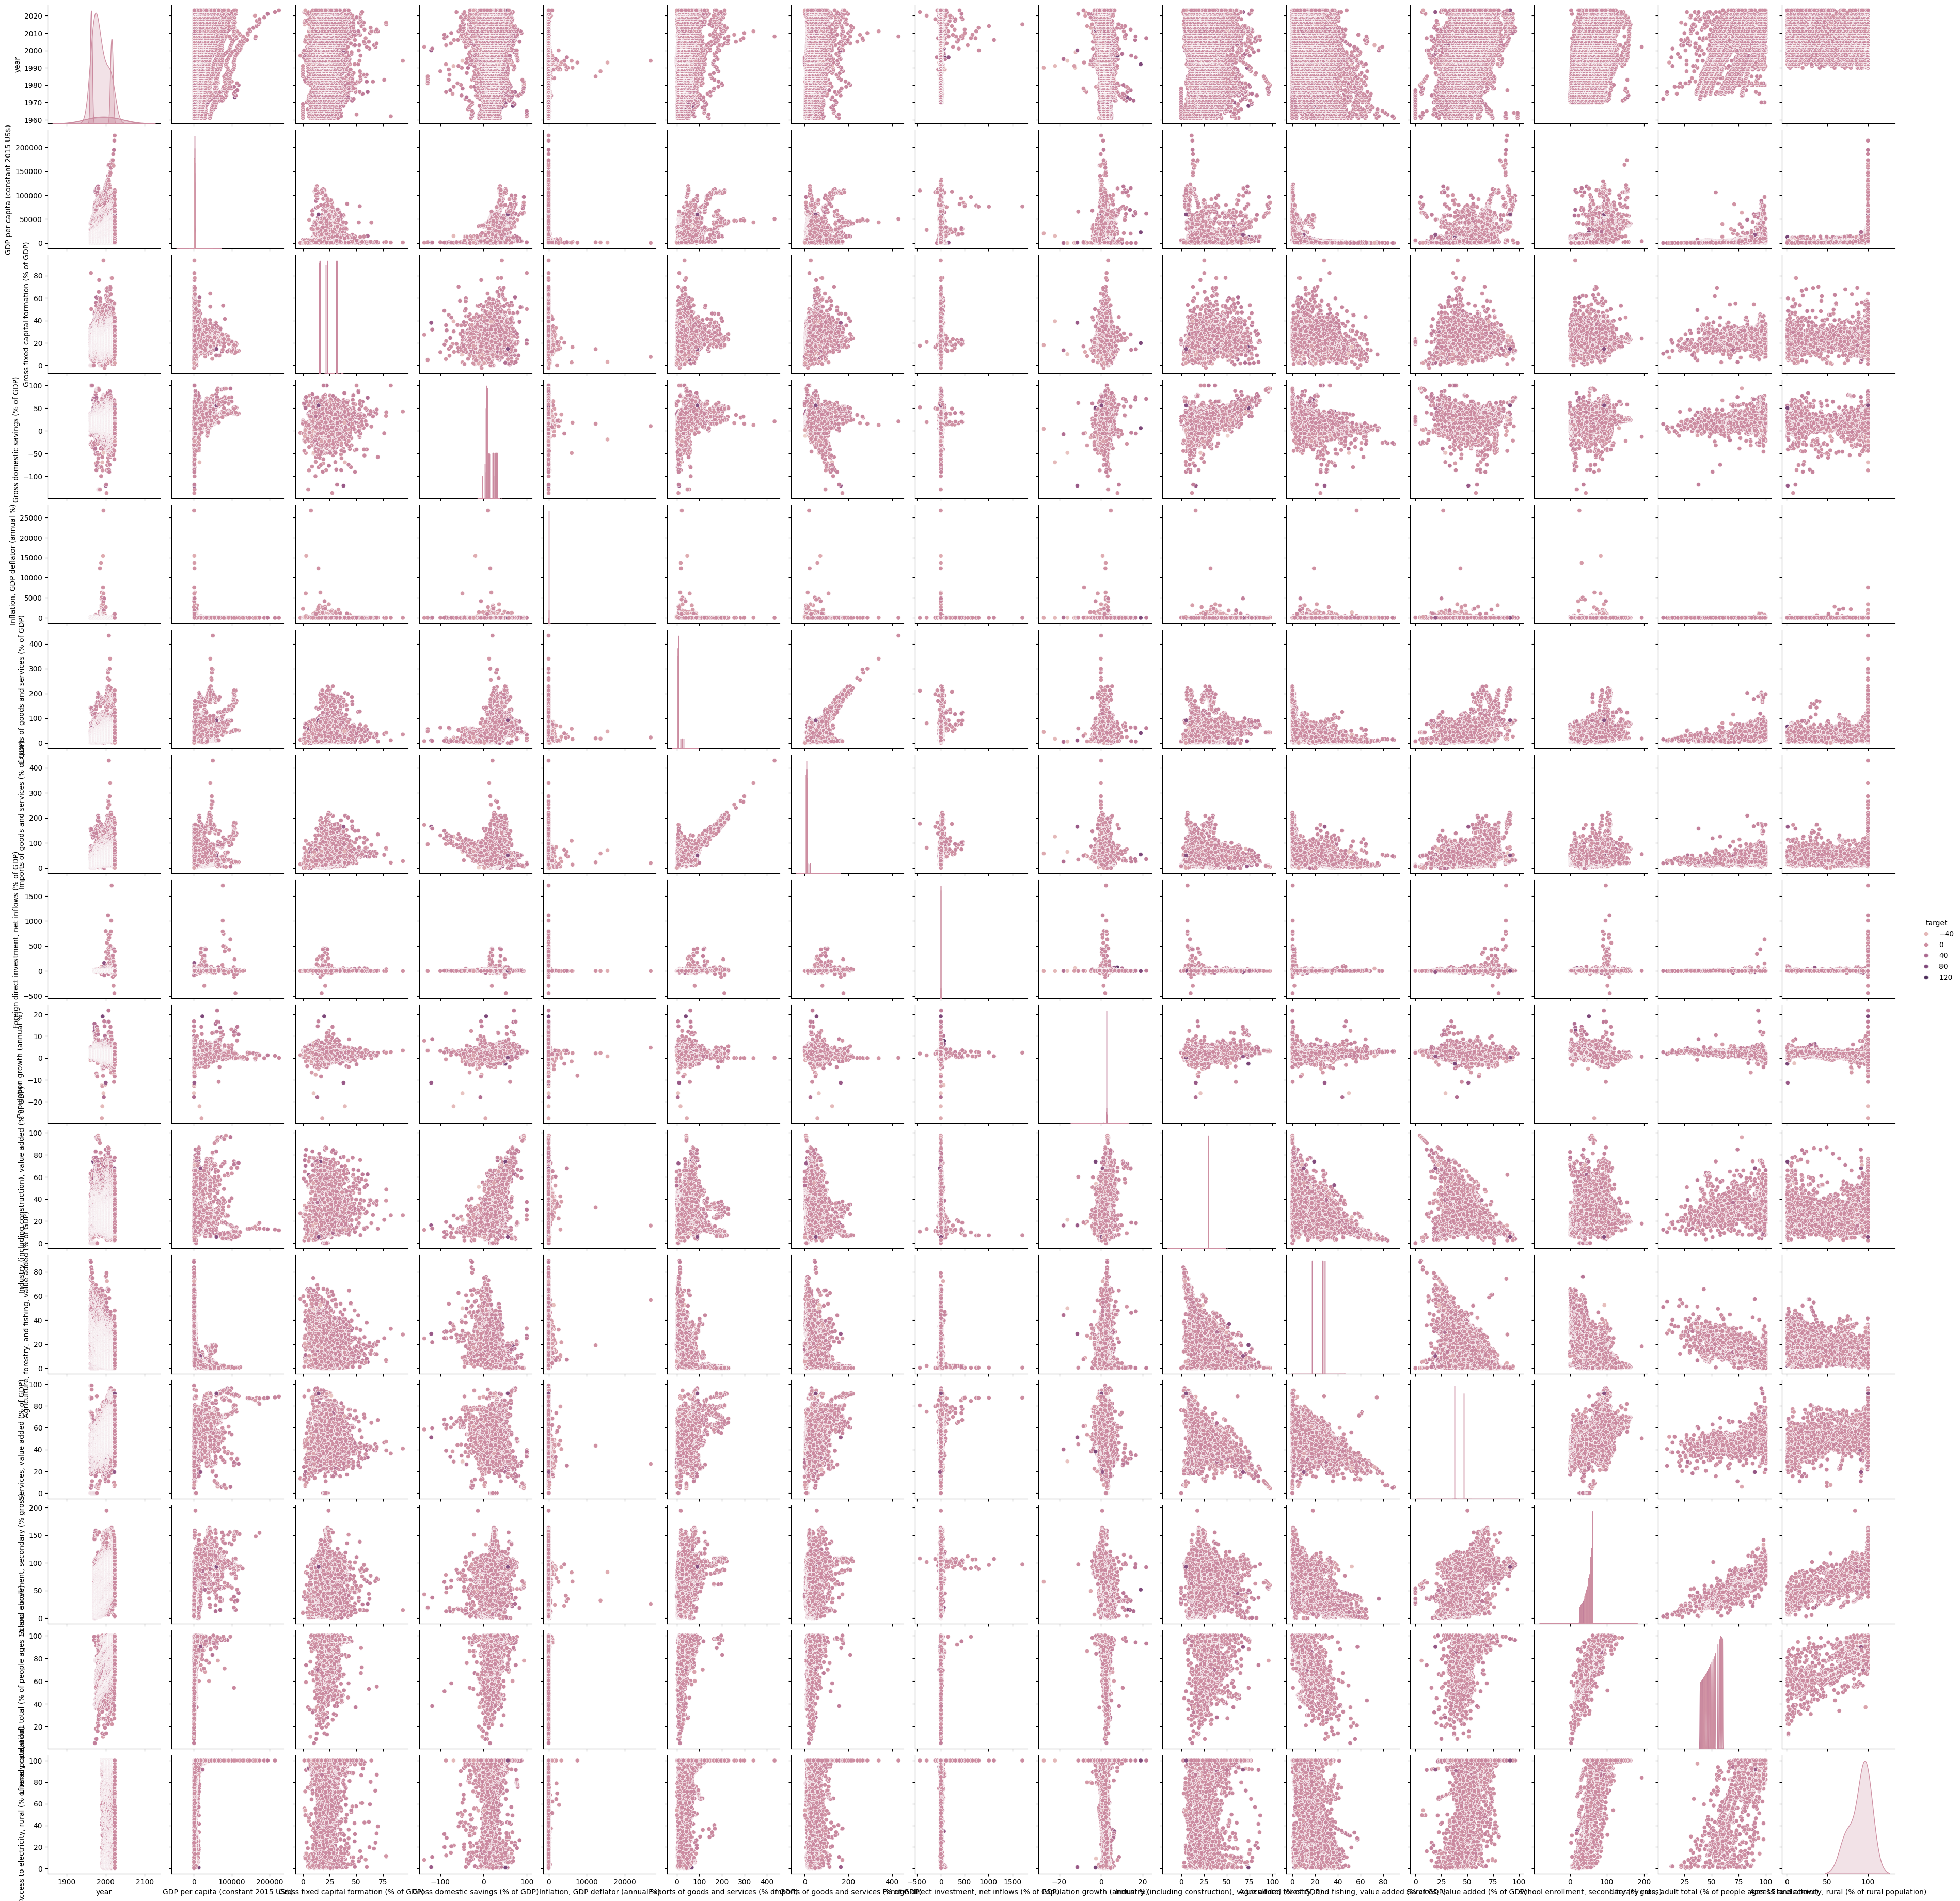

In [23]:
# Variables numericas vs target categórico
sns.pairplot(df,
            kind='scatter',
            hue='target');

#Hard to tell with this graph

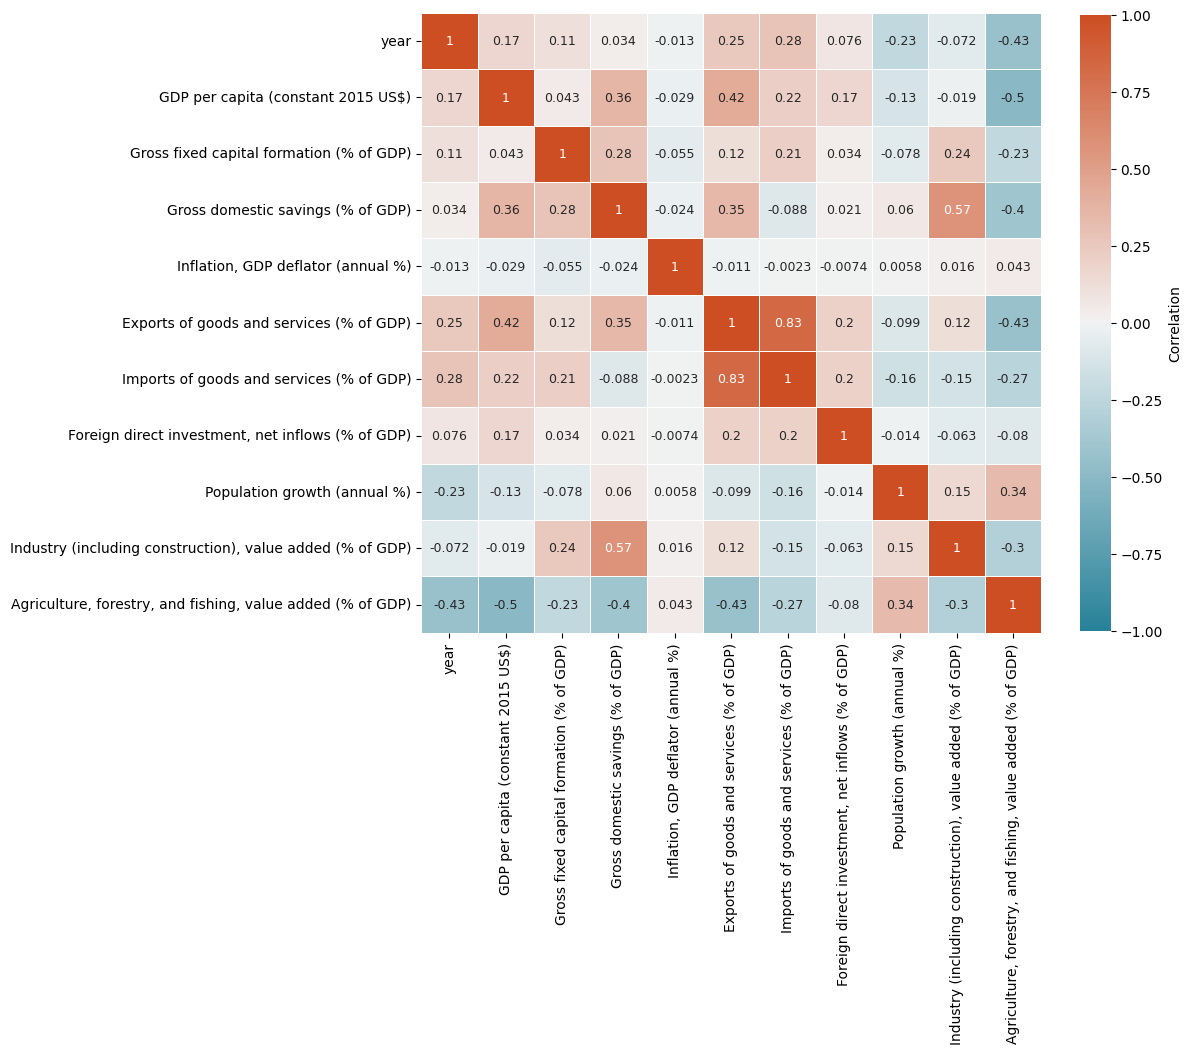

In [24]:
plt.figure(figsize=(10, 10))

sns.heatmap(
    X_train.corr(numeric_only=True),
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(220, 20, as_cmap=True, s=90, l=50, n=256),
    square=True,
    annot=True,
    linewidths=0.5,
    annot_kws={"size": 9},
    cbar_kws={"shrink": 0.8, "label": "Correlation"}
);

In [25]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


interval columns not set, guessing: ['year', 'GDP per capita (constant 2015 US$)', 'Gross fixed capital formation (% of GDP)', 'Gross domestic savings (% of GDP)', 'Inflation, GDP deflator (annual %)', 'Exports of goods and services (% of GDP)', 'Imports of goods and services (% of GDP)', 'Foreign direct investment, net inflows (% of GDP)', 'Population growth (annual %)', 'Industry (including construction), value added (% of GDP)', 'Agriculture, forestry, and fishing, value added (% of GDP)']


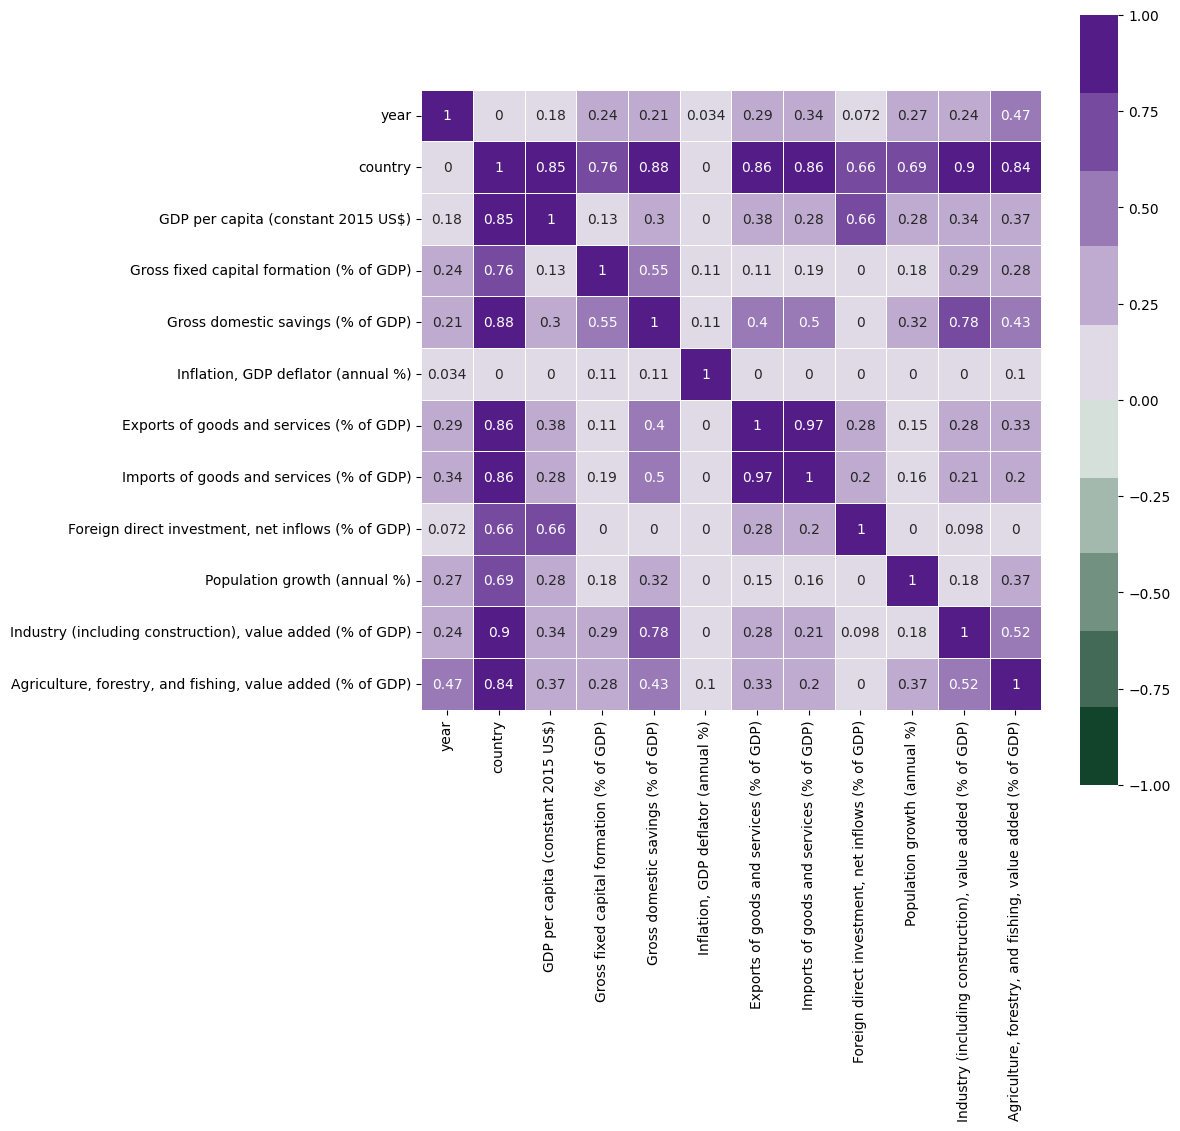

In [26]:
import phik
phik_matrix = X_train.phik_matrix()

plt.figure(figsize=(10,10))
sns.heatmap(phik_matrix,
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

# **9. Feature Elimination, Duplicates, Missings**

In [27]:
duplicate_percent = X_train.duplicated().mean() * 100
print(f"{duplicate_percent:.2f}% of rows are duplicates")
#No dupliacted so going to treatment of the missing values

0.00% of rows are duplicates


In [28]:
#Missing
missing_summary = X_train.isnull().sum().sort_values(ascending=False)
missing_summary = missing_summary[missing_summary > 0]
missing_summary

Gross fixed capital formation (% of GDP)                      5702
Gross domestic savings (% of GDP)                             5133
Industry (including construction), value added (% of GDP)     5056
Agriculture, forestry, and fishing, value added (% of GDP)    4992
Exports of goods and services (% of GDP)                      4875
Imports of goods and services (% of GDP)                      4862
Foreign direct investment, net inflows (% of GDP)             4533
Inflation, GDP deflator (annual %)                            2755
GDP per capita (constant 2015 US$)                            2580
Population growth (annual %)                                   446
dtype: int64

How I will deal with missings:
1. Dropping rows with missing target
2.  Imputation for features

In [29]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 1. Drop rows where target is missing
print(f"Original dataset shape: {X_train.shape}")
X_train = X_train.dropna(subset=['target']) 
print(f"After dropping missing targets: {X_train.shape}")

<Axes: >

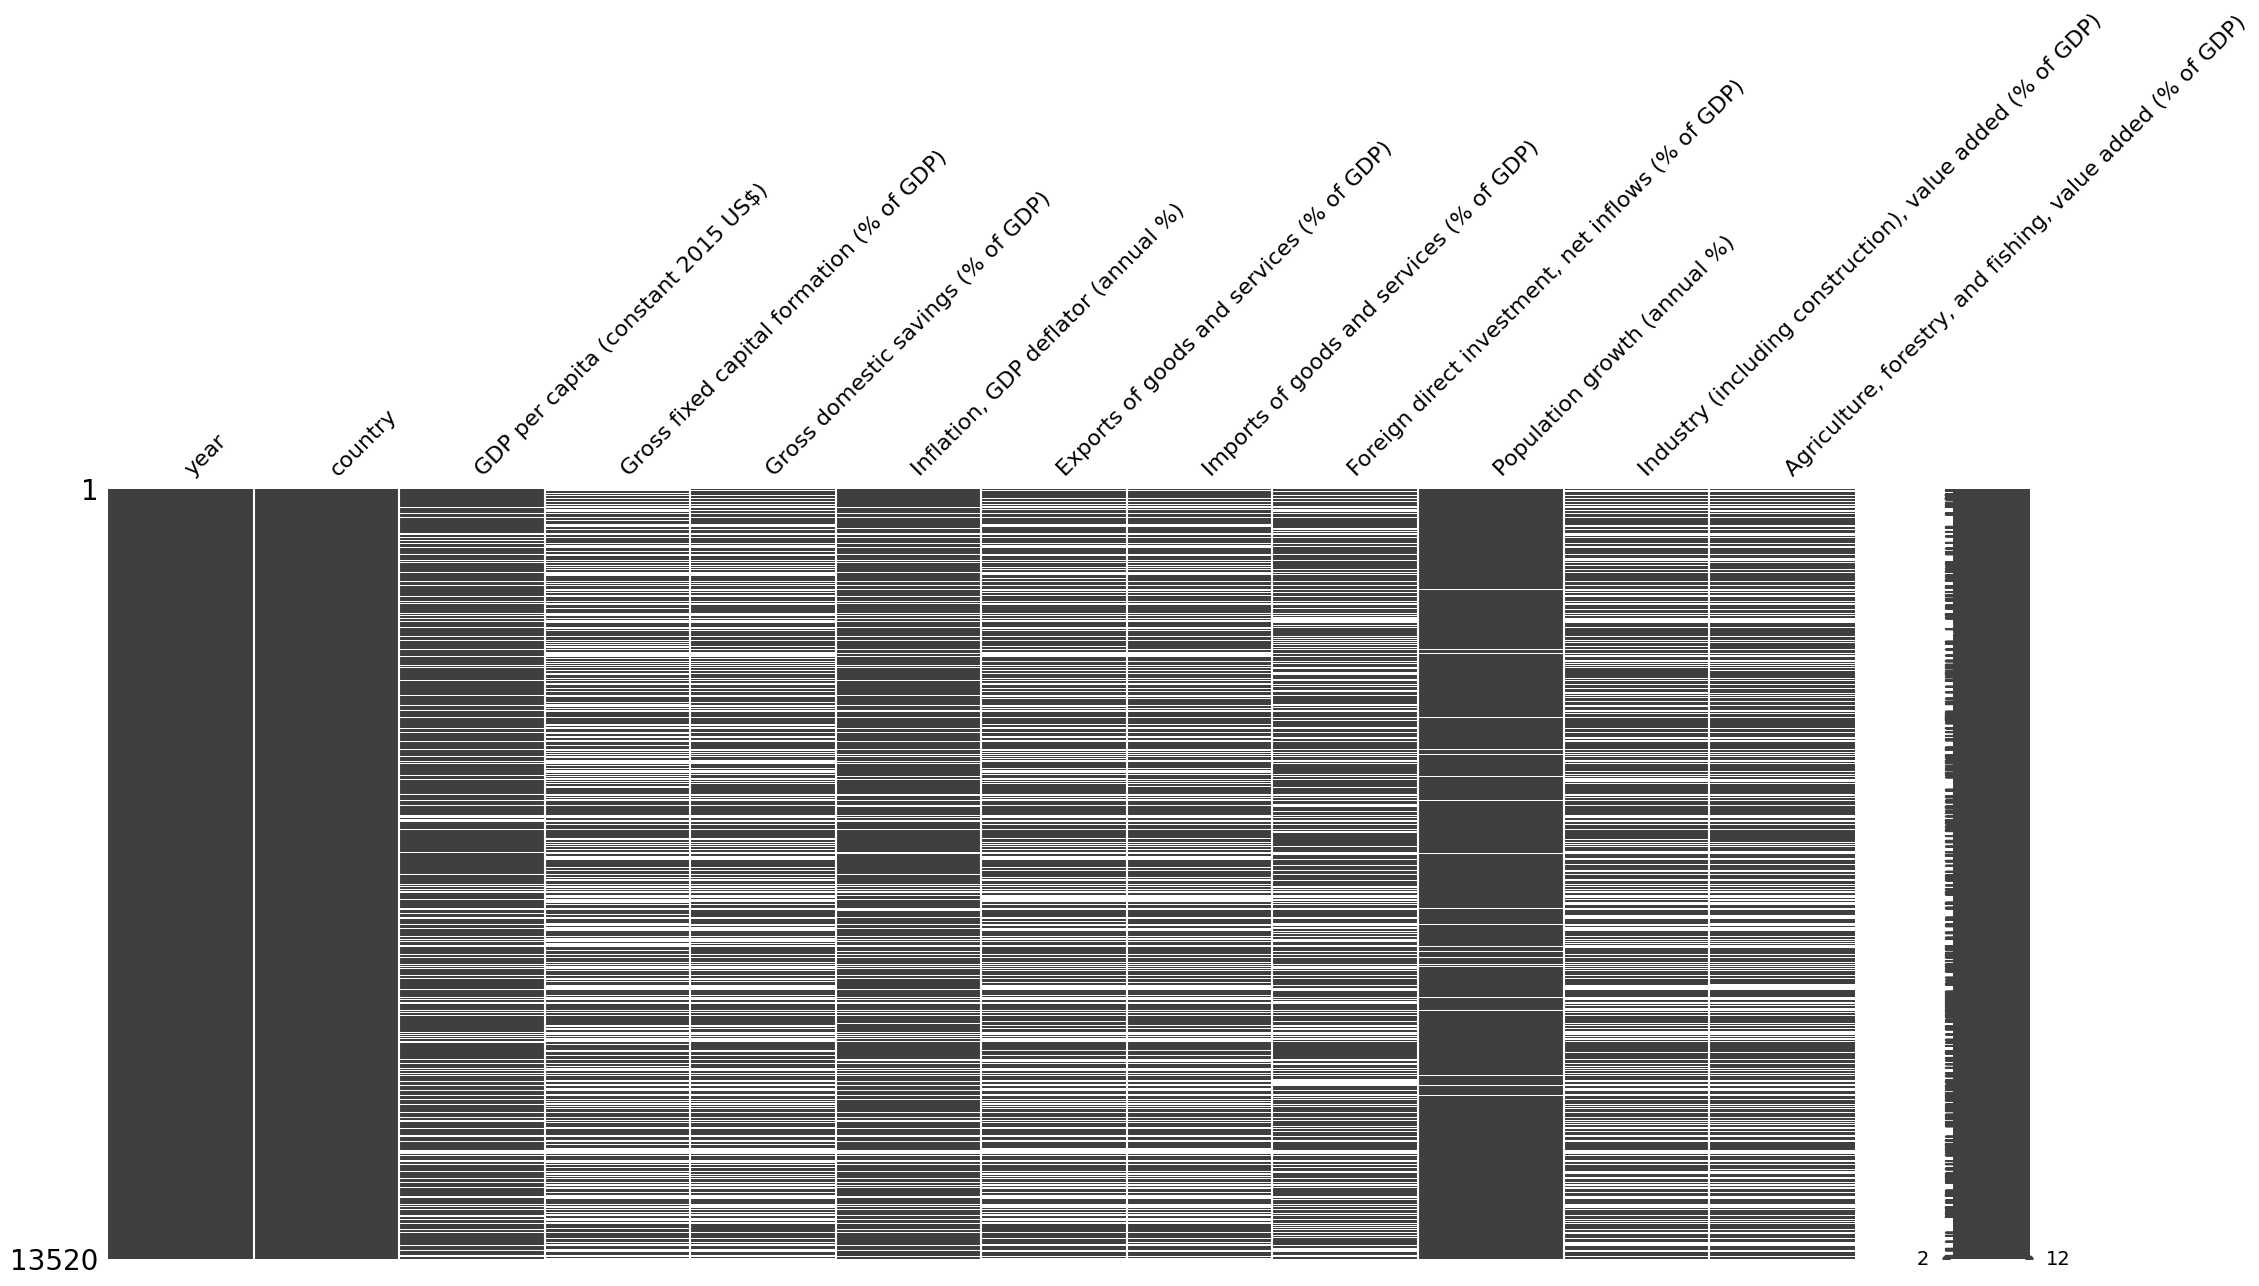

In [31]:


# 2. Analyze missing patterns in remaining data
import missingno as msno
msno.matrix(X_train)  

In [ ]:
#Im taking into account:
# That economic indicators are country-specific - Using country-based imputation preserves economic patterns
# That time trends matter - Linear interpolation can capture economic trends
# A fallback strategy - Global median ensures no missing values remain
# And preserves relationships - KNN imputation considers variable correlation

In [32]:
def hybrid_imputation(df):
    """Country-aware imputation with sklearn fallback"""
    from sklearn.impute import SimpleImputer
    
    df_imputed = df.copy()
    numeric_cols = df_imputed.select_dtypes(include=['float64', 'int64']).columns
    
    # Step 1: Try country-based imputation where possible
    if 'country' in df_imputed.columns:
        for col in numeric_cols:
            # Fill with country median where available
            df_imputed[col] = df_imputed.groupby('country')[col].transform(
                lambda x: x.fillna(x.median()) if x.notna().any() else x
            )
    
    # Step 2: Use sklearn for remaining missing values
    remaining_missing = df_imputed[numeric_cols].isnull().sum()
    if remaining_missing.sum() > 0:
        print(f"Using sklearn imputation for remaining {remaining_missing.sum()} missing values")
        imputer = SimpleImputer(strategy='median')
        df_imputed[numeric_cols] = imputer.fit_transform(df_imputed[numeric_cols])
    
    return df_imputed

# Use hybrid approach
X_train_imputed = hybrid_imputation(X_train)
X_test_imputed = hybrid_imputation(X_test)

Using sklearn imputation for remaining 9236 missing values
Using sklearn imputation for remaining 2594 missing values


<Axes: >

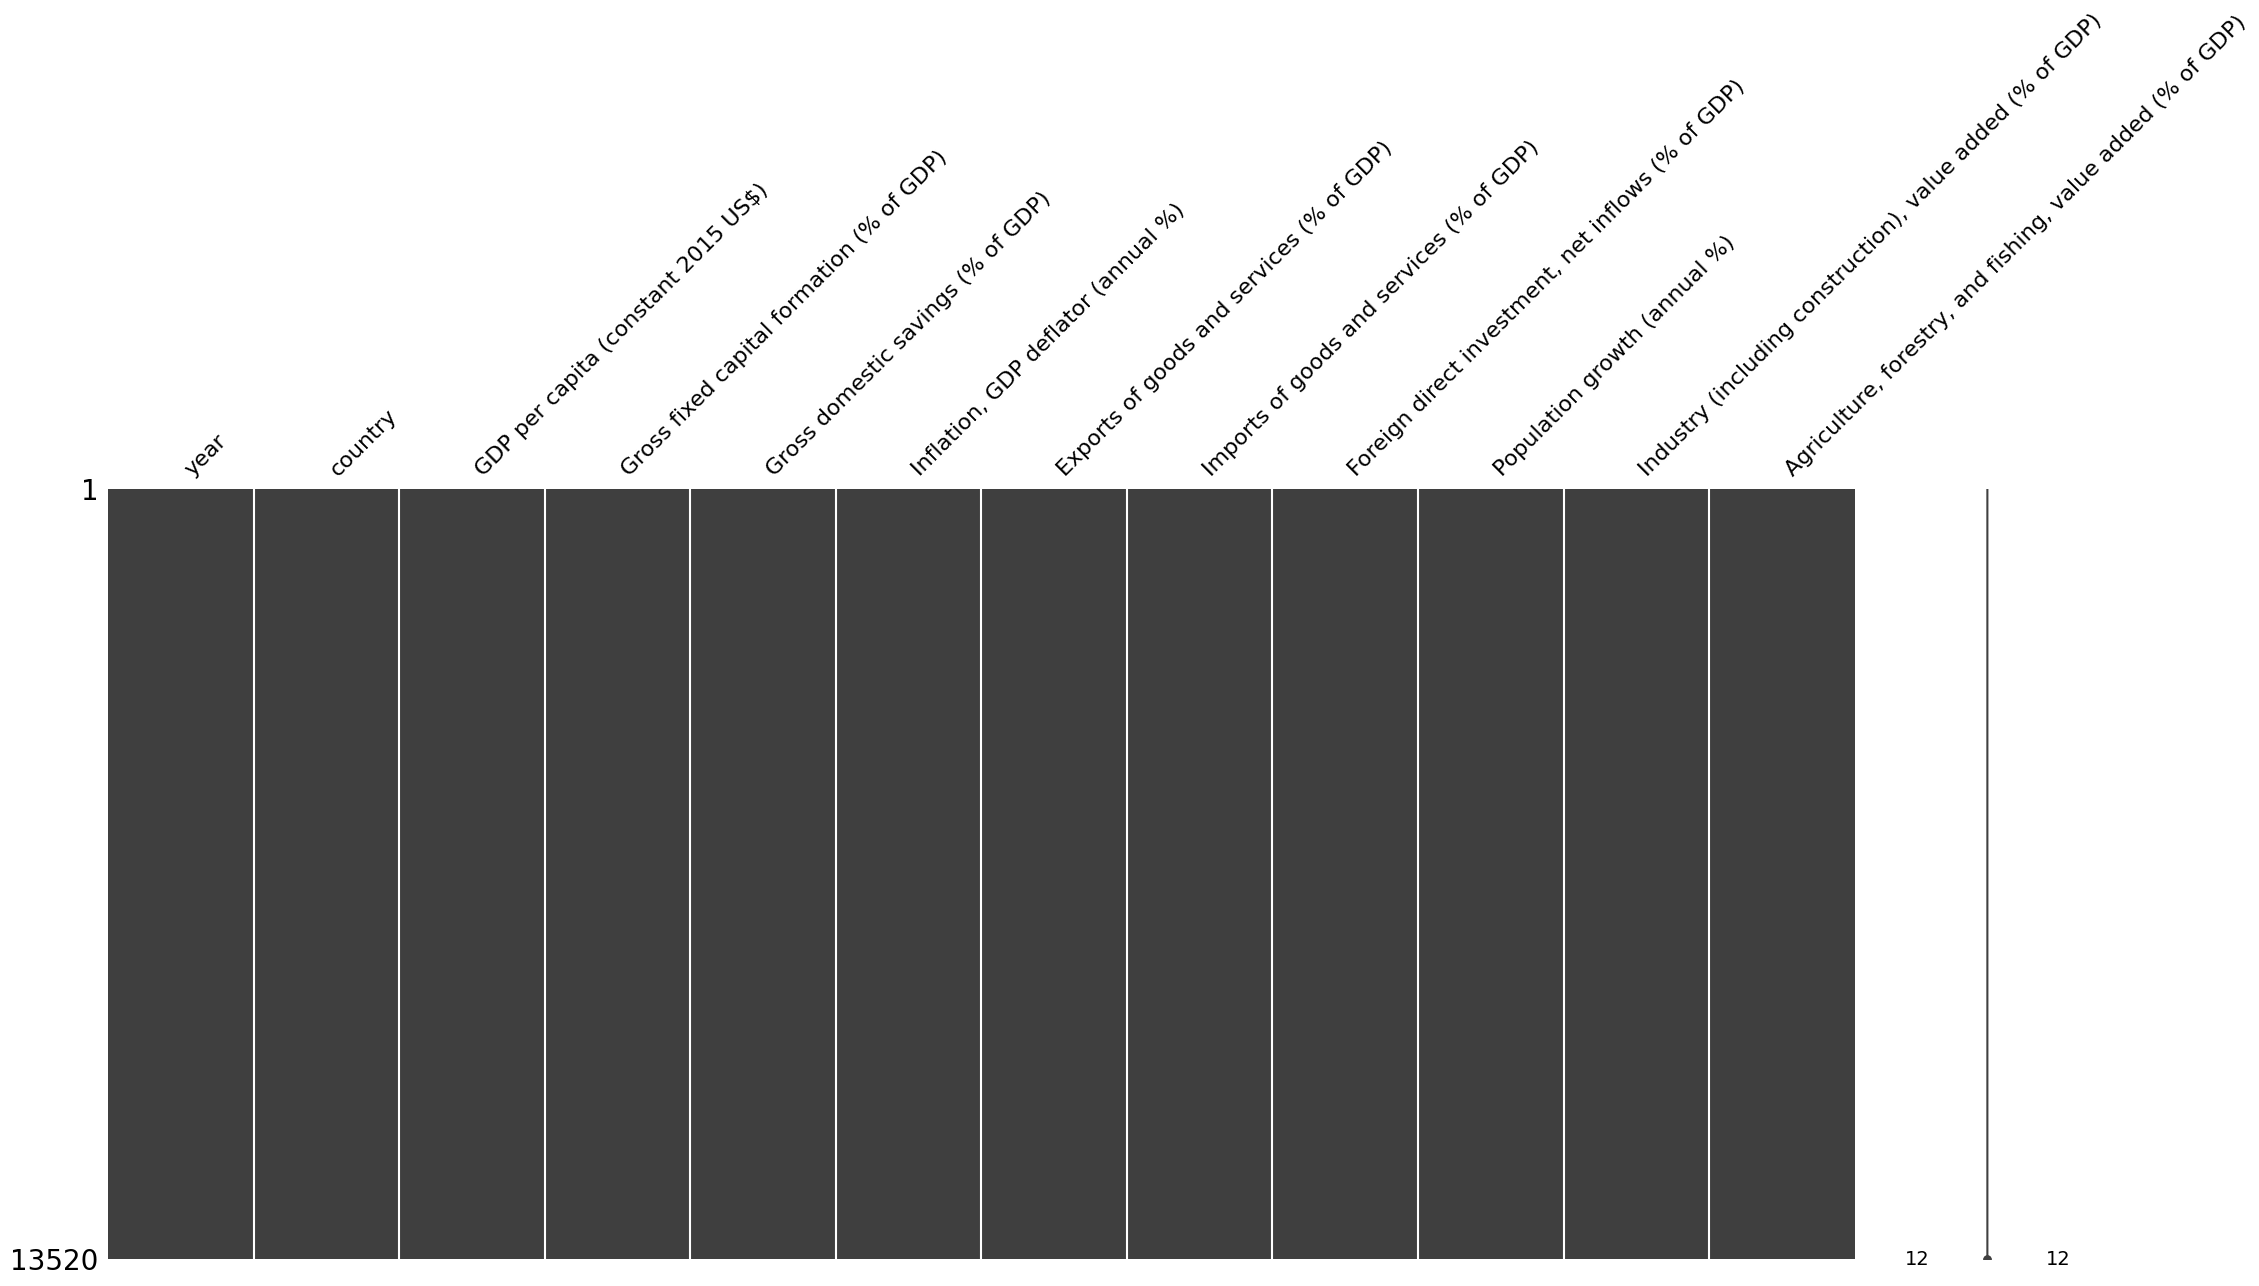

In [33]:
import missingno as msno

msno.matrix(X_train_imputed)

#All done!

<Axes: >

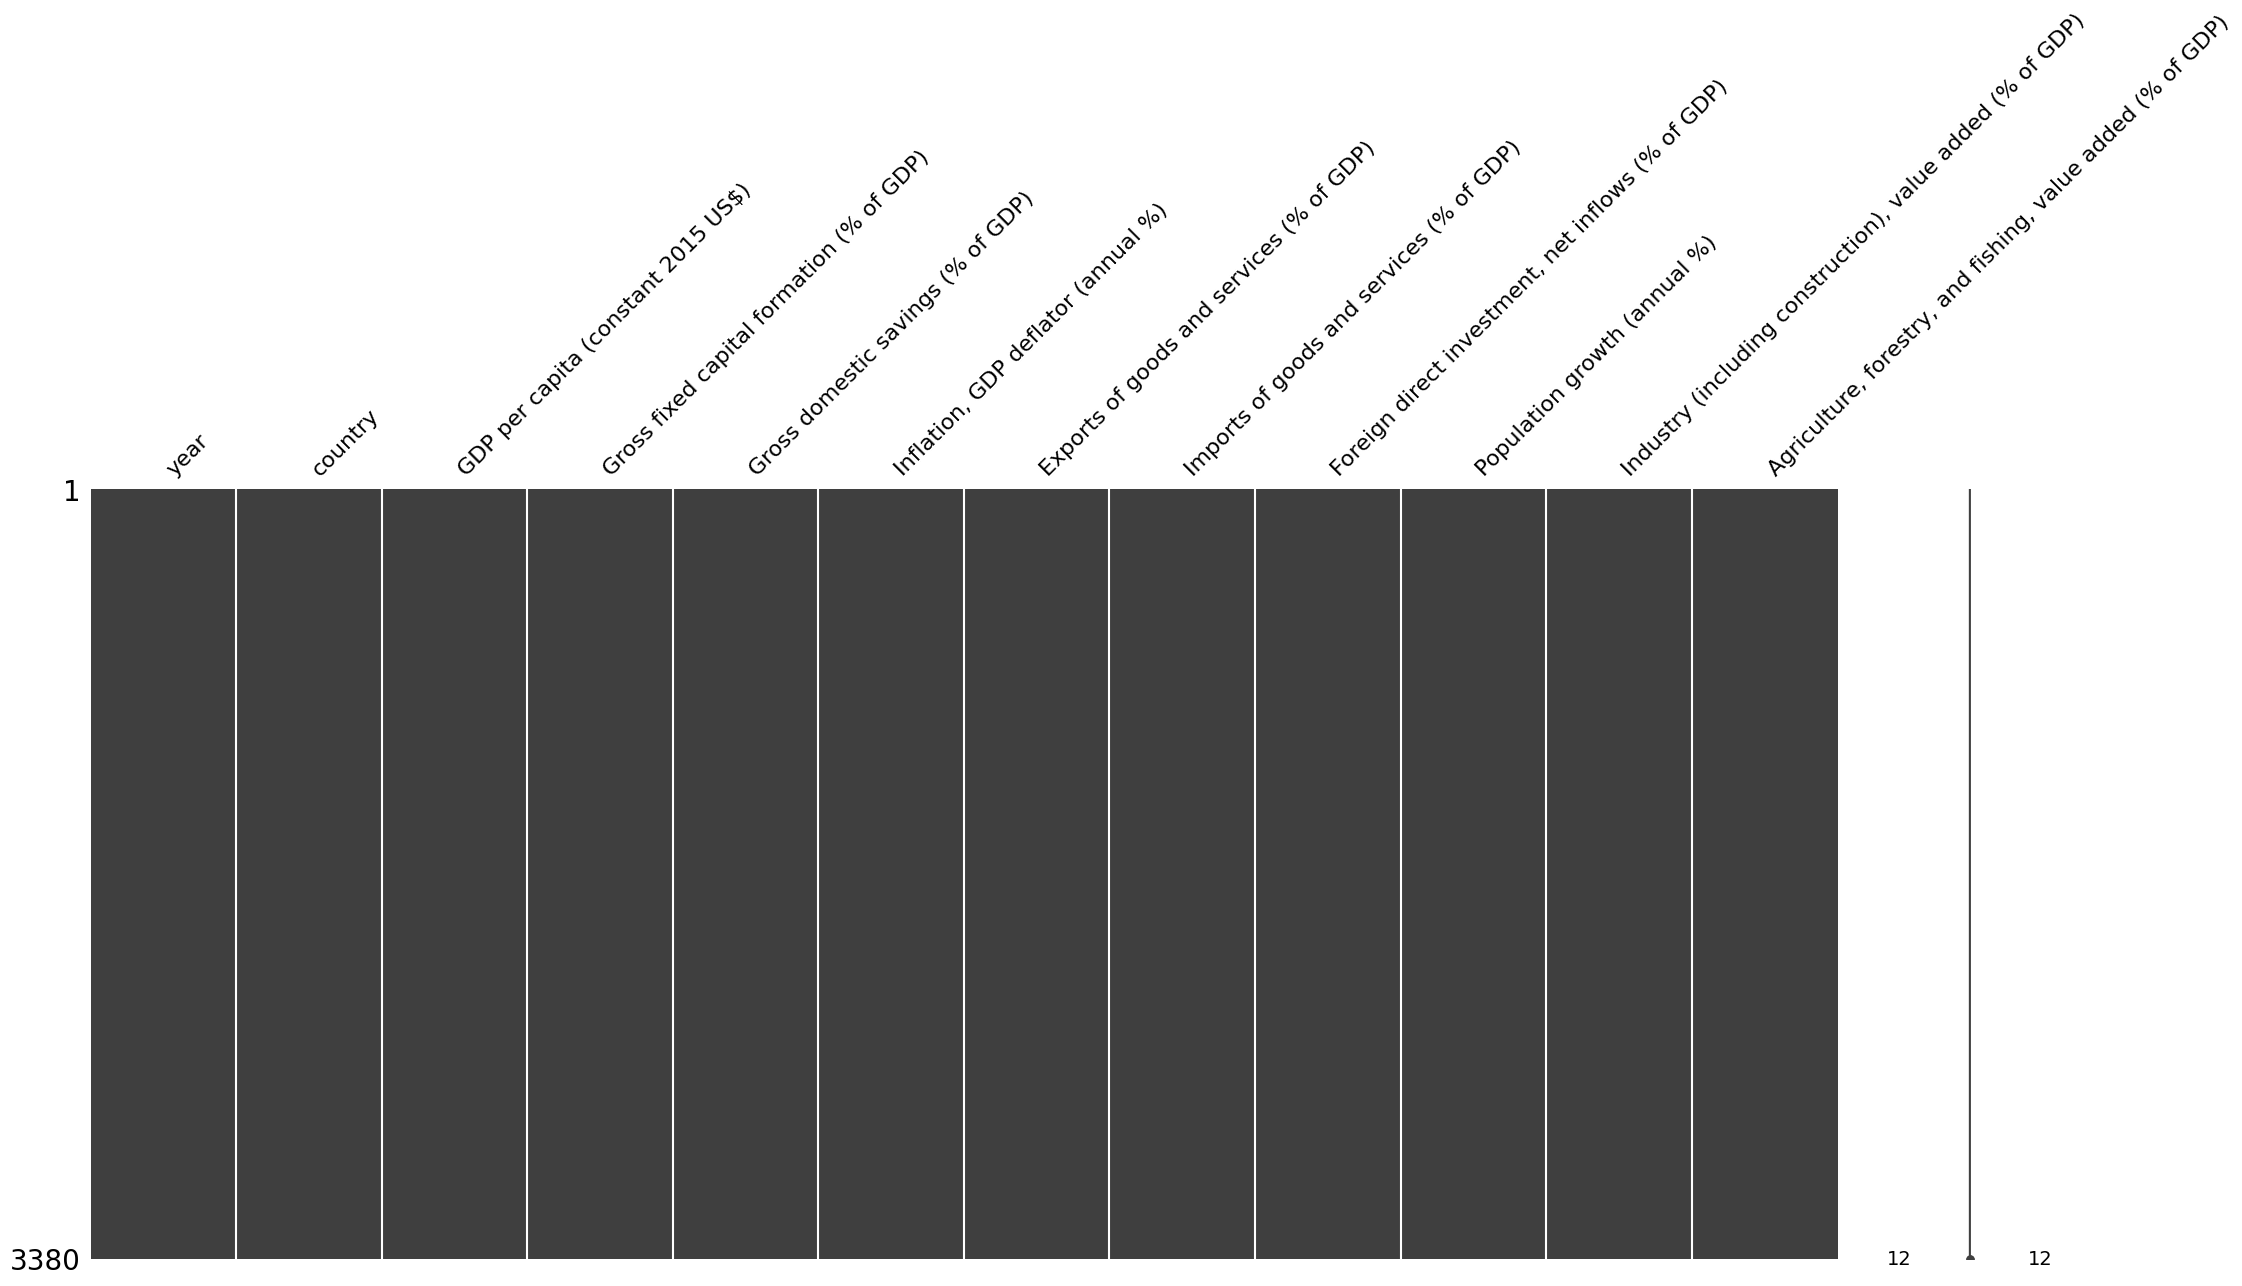

In [34]:
msno.matrix(X_test_imputed)